In [46]:
from qiskit import QuantumCircuit

In [47]:
want_colors = 1 # from input 1=color, 0=b/w
seconds = 10 # length of generated gif
fps = 12
x = 10 # dimension of generated image ( # of tiles in x)
y = 11# dimension of generated image ( # of tiles in y)

frameAmount = seconds * fps

In [48]:
# Use AerSimulator
from qiskit.providers.aer import AerSimulator

backend = AerSimulator()

In [49]:
# Create a Quantum Circuit acting on a quantum register of seven qubits
qubits = 7
circ = QuantumCircuit(qubits)

#always is variable 0-1
circ.h(1) #shape
circ.h(5) #rot1
circ.h(6) #rot2

# set q0 to 1 if wants colors
if want_colors:
    circ.x(0)

# Set colors to 0-1 if q0 is 1 (want_colors)
circ.ch(0, 2) #colors1 0-1 if q0 is 1
circ.ch(0, 3) #colors2 0-1 if q0 is 1

# Set b/w-w/b to 0-1 if !want_colors
circ.x(0) #invert q0
circ.ch(0, 4) #b/w 0-1 if q0 is 1 now

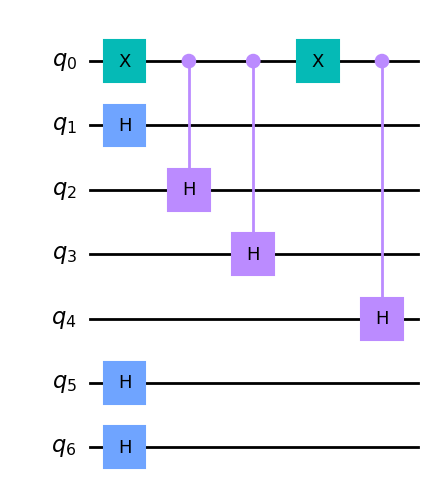

In [50]:
circ.draw('mpl')

In [51]:
from qiskit.quantum_info import Statevector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**qubits)

# Evolve the state by the quantum circuit
state = state.evolve(circ)

# draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [52]:
# state.draw('qsphere')

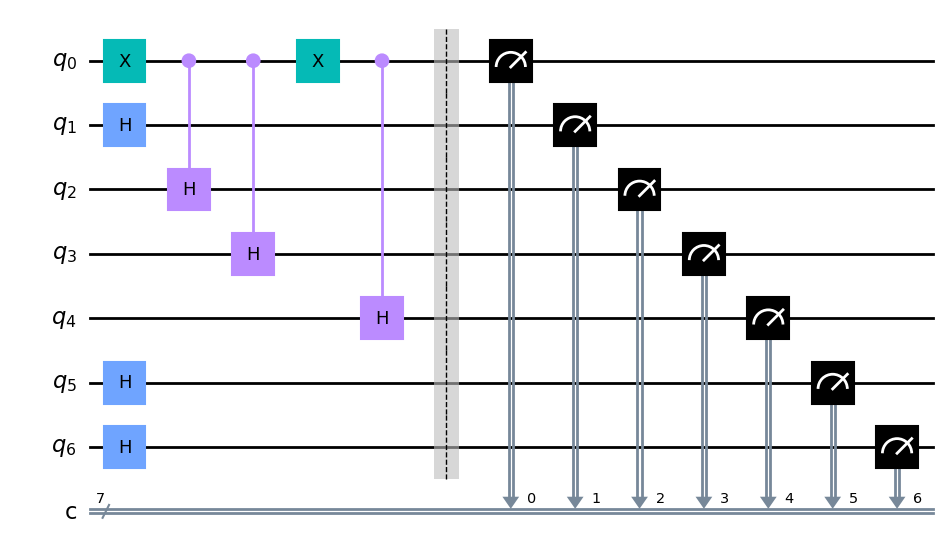

In [53]:
# Create a Quantum Circuit
meas = QuantumCircuit(qubits, qubits)
meas.barrier(range(qubits))
# map the quantum measurement to the classical bits
meas.measure(range(qubits), range(qubits))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before) 
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(circ, range(qubits), front=True)

#drawing the circuit
qc.draw('mpl')

In [54]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import compiler

# First we have to transpile the quantum circuit 
# to the low-level QASM instructions used by the 

qc.save_statevector(label = 'test', pershot = True)
# backend
# qc_compiled = transpile(qc, backend)
qc_compiled = compiler.transpile(qc, backend, optimization_level=2)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
job_sim = backend.run(qc_compiled, shots=x*y, memory=True)
job_simGlitch = backend.run(qc_compiled, shots=1000, memory=True)

# Grab the results from the job.
result_sim = job_sim.result()
result_simGlitch = job_simGlitch.result()

memory = result_sim.get_memory(0)
memoryGlitch = result_simGlitch.get_memory(0)
print(memory)
print(len(memory))

['0100000', '0001000', '1001100', '1000110', '0101110', '1101010', '1100110', '1101010', '1000010', '1001110', '0001000', '0000010', '1101100', '0100000', '1000110', '1000110', '0001100', '1100010', '0001100', '0000010', '0001000', '0101010', '0001100', '1000110', '1001010', '0101110', '1100110', '1100100', '1101100', '1000100', '1001010', '1100100', '1000010', '1001010', '0100000', '0100000', '0000010', '0000000', '0100100', '1101110', '0101000', '0100100', '0101100', '1000100', '1100000', '0100110', '1000100', '0001000', '1000010', '1001010', '0100100', '0101000', '1100110', '1101000', '0100100', '0101100', '0100010', '0000110', '0001000', '1000100', '1100000', '1100000', '1000110', '1001000', '1000000', '0001010', '0000110', '1100000', '1101010', '1101100', '0100000', '0101110', '1100010', '0000000', '1100000', '0101010', '0100100', '0101100', '0000100', '1001010', '0101000', '1101100', '1100100', '0100000', '0101110', '1101010', '0101000', '0100010', '0101000', '0001010', '0000000'

In [55]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'1001000': 1, '1001110': 1, '1001010': 5, '1000010': 5, '1100010': 2, '0000010': 4, '1101010': 5, '1100110': 6, '1001100': 1, '0000110': 3, '1101100': 6, '0100000': 7, '1000110': 5, '0001000': 6, '0001100': 3, '0000100': 1, '1100100': 3, '0100100': 5, '0000000': 3, '1101000': 1, '1000100': 4, '0101000': 5, '0100110': 2, '1101110': 1, '0101010': 2, '0101100': 3, '1100000': 8, '0101110': 4, '0001010': 4, '1000000': 2, '0100010': 2}


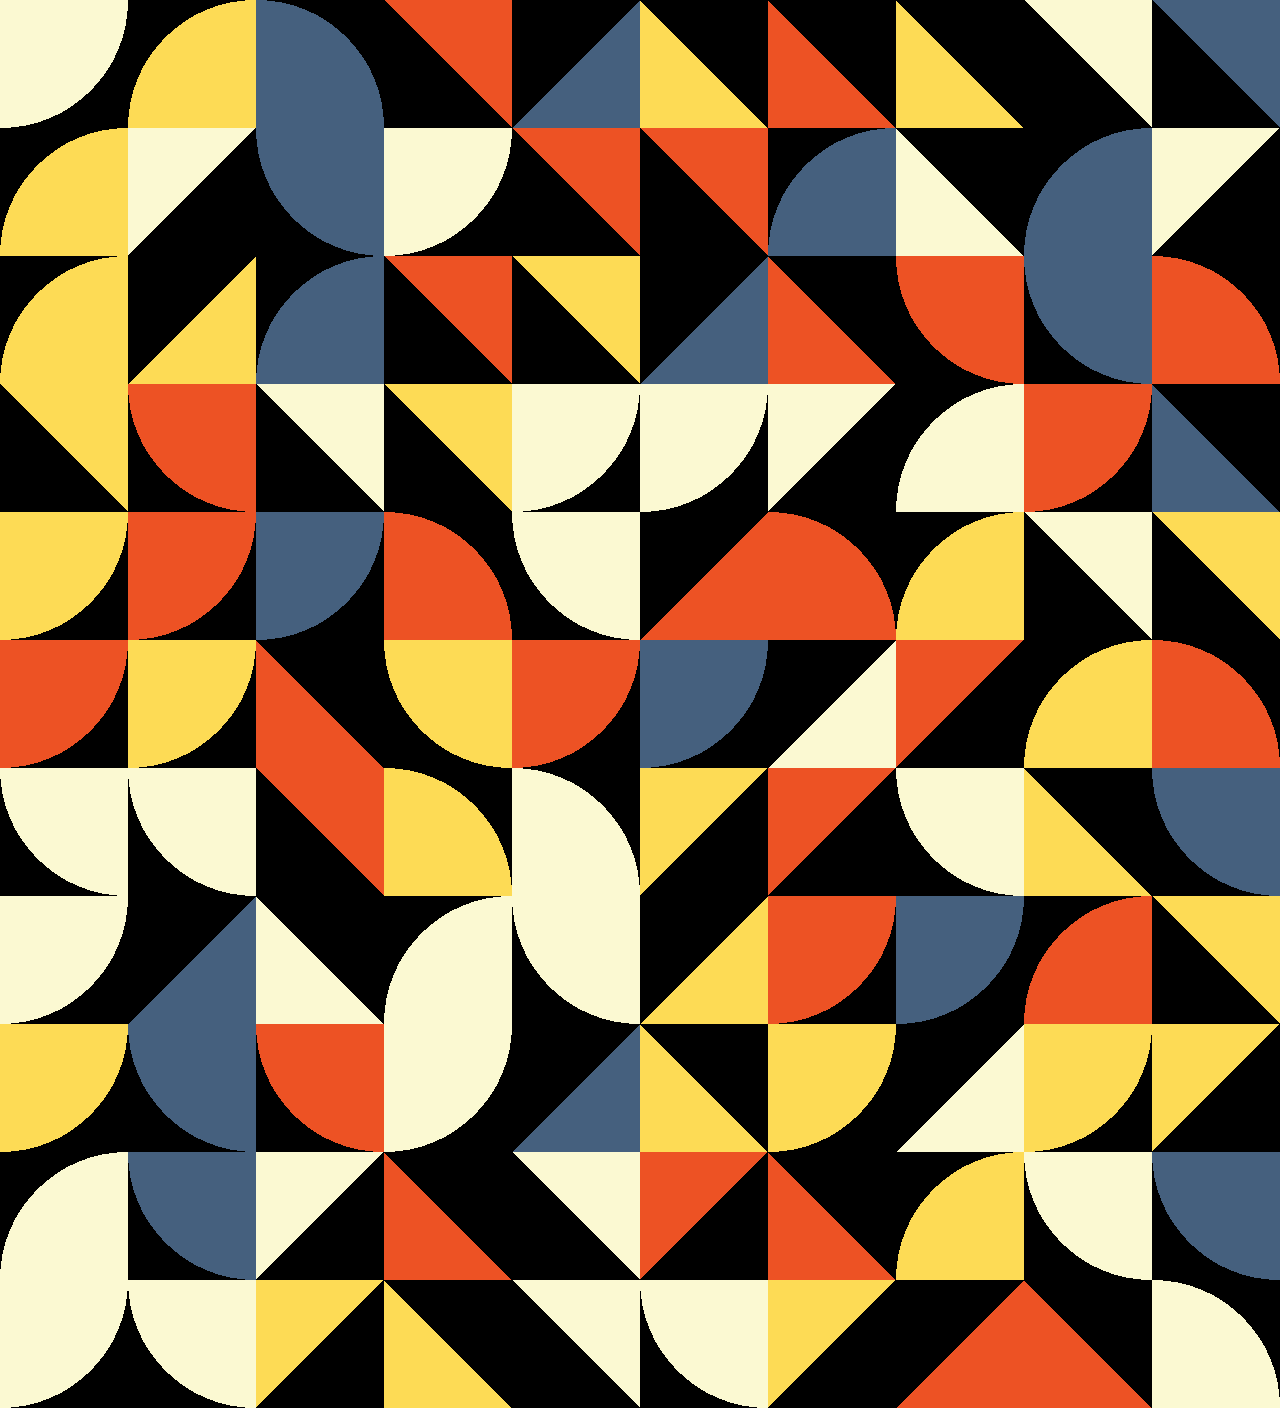

In [56]:
from PIL import Image, ImageDraw, ImageFilter

tileFileNames = ['0000000','0000001','0000010','0000011','0001000','0001001','0001010','0001011','0010000','0010001','0010010','0010011','0011000','0011001','0011010','0011011','0100000','0100001','0100010','0100011','0101000','0101001','0101010','0101011','0110000','0110001','0110010','0110011','0111000','0111001','0111010','0111011','1000000','1000001','1000010','1000011','1000100','1000101','1000110','1000111','1100000','1100001','1100010','1100011','1100100','1100101','1100110','1100111']
tiles = {}
for tile in tileFileNames:
    tiles[tile] = Image.open('tiles/'+tile+'.png')

tile_size = 128
image = Image.new(mode="RGB", size=(x*tile_size, y*tile_size))

for idx, i in enumerate(memory):
    tile_x = idx % x
    tile_y = idx // x
    im = tiles[i[::-1]]
    image.paste(im, (tile_x*tile_size, tile_y*tile_size))
image.save('output.png', quality=100)
display(image)

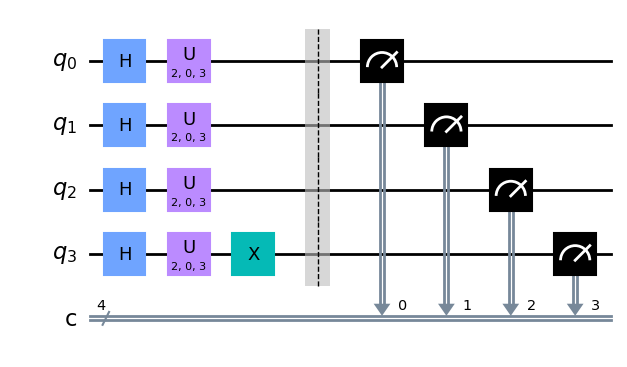

In [57]:
# Create a Quantum Circuit
glitchingCircuit = QuantumCircuit(4)

glitchingCircuit.h(0)
glitchingCircuit.h(1)
glitchingCircuit.h(2)
glitchingCircuit.h(3)

glitchingCircuit.u(2, 0, 3, 1)
glitchingCircuit.u(2, 0, 3, 2)
glitchingCircuit.u(2, 0, 3, 3)
glitchingCircuit.u(2, 0, 3, 0)
# glitchingCircuit.measure(2,[0])
glitchingCircuit.x(3)

meas = QuantumCircuit(4, 4)
meas.barrier(range(4))
# map the quantum measurement to the classical bits
meas.measure(range(4), range(4))

# The Qiskit circuit object supports composition.
# Here the meas has to be first and front=True (putting it before) 
# as compose must put a smaller circuit into a larger one.
qc = meas.compose(glitchingCircuit, range(4), front=True)

#drawing the circuit
qc.draw('mpl')

In [58]:
#prepare randomnes data for glitching

qc.save_statevector(label = 'glitches', pershot = True)
# backend
qc_compiled = compiler.transpile(qc, backend)

glitchOpportunities = frameAmount
job_sim = backend.run(qc_compiled, shots=glitchOpportunities, memory=True)

# Grab the results from the job.
result_sim = job_sim.result()

glitchMemory = result_sim.get_memory(0)

{'1010': 4, '0010': 1, '0000': 5, '1001': 3, '1100': 7, '1000': 100}


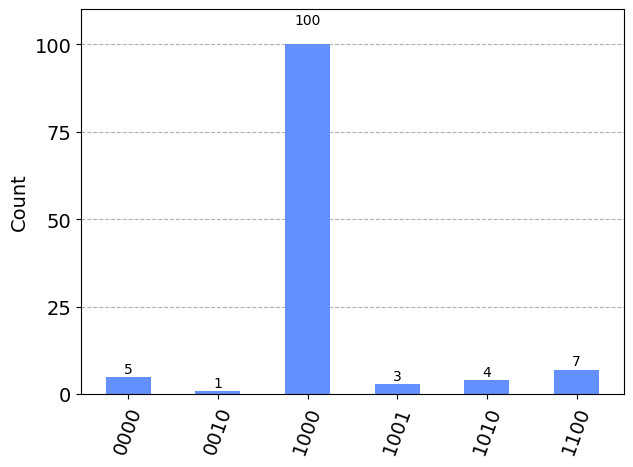

In [59]:
counts = result_sim.get_counts(qc_compiled)
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [60]:
from copy import deepcopy

timePerFrame = 1 / fps

frames = [image];

for frame in range(frameAmount):
    newImage = deepcopy(frames[-1])
    for idx, i in enumerate(memory):
        if glitchMemory[(idx * frame) % frameAmount] == '0010':
            tile_x = idx % x
            tile_y = idx // x
            randomFile = memoryGlitch.pop()
            im = tiles[randomFile[::-1]]
            newImage.paste(im, (tile_x*128, tile_y*128))
    frames.append(deepcopy(newImage))
    
frames[0].save('output.gif',
               save_all=True, append_images=frames[1:], optimize=False, duration=timePerFrame, loop=0)